In [146]:
import requests
import pandas as pd
import numpy as np
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [147]:
r= requests.get(url)

In [148]:
json= r.json()

In [149]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

# Element

In [150]:

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [151]:
elements_df.head(10)

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,68,37605.jpg,0.0,Özil,0.6,False,None,n,1,3,0,3311,7,49890,737,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,600,238,600,238,600,238,600,238,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-1,1,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-21T10:30:18.546407Z,49,39476.jpg,0.0,Papastathopoulos,0.1,False,None,n,1,3,0,10210,5,18233,145,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,555,209,546,209,534,203,557,209,NaN,,NaN,,NaN,
2,100.0,100.0,41270,0,0,0,0,0,2,1.3,1.3,0,David,0.8,3,False,,2020-10-25T21:30:13.186040Z,55,41270.jpg,1.4,Luiz Moreira Marinho,0.9,False,None,a,1,3,7,32994,1564,67086,1970,0.1,1.3,David Luiz,319,0,0,0,5,0,0,0,0,0,0,0,51,66.6,9.8,21.0,9.7,200,83,309,101,236,70,268,90,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-3,3,0,3,4.0,4.0,2,Pierre-Emerick,3.5,4,False,,2020-10-08T09:00:12.305506Z,117,54694.jpg,3.8,Aubameyang,13.1,False,None,a,1,3,30,412603,4462,2635466,60714,0.3,2.6,Aubameyang,716,2,1,2,10,0,0,0,2,0,0,1,111,133.4,147.8,151.0,43.2,79,27,32,25,44,25,39,21,NaN,,6.0,,1.0,
4,100.0,100.0,58822,0,0,-3,3,0,2,0.5,0.5,0,Cédric,0.0,5,False,,2020-09-23T09:00:14.881983Z,47,58822.jpg,0.0,Soares,0.2,False,None,a,1,3,0,2901,89,31164,410,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,533,203,521,203,498,193,535,203,NaN,,NaN,,NaN,
5,NaN,NaN,59966,0,0,-1,1,0,4,2.0,2.0,2,Alexandre,1.5,6,False,,None,84,59966.jpg,3.9,Lacazette,3.3,False,None,a,1,3,27,263114,3563,362857,12947,0.2,3.2,Lacazette,485,3,0,2,5,0,0,0,1,0,0,3,88,126.4,73.8,186.0,38.3,97,14,110,14,34,18,50,16,NaN,,5.0,,3.0,
6,100.0,100.0,69140,0,0,0,0,0,2,1.0,1.0,0,Shkodran,0.5,7,False,,2020-08-15T10:00:11.331812Z,50,69140.jpg,1.0,Mustafi,0.0,False,None,a,1,3,2,10736,175,10654,134,0.1,0.4,Mustafi,44,0,0,0,1,0,0,0,0,0,0,0,13,11.6,1.0,0.0,1.3,358,140,369,141,554,210,390,145,NaN,,NaN,,NaN,
7,NaN,NaN,80201,0,0,0,0,1,1,4.0,4.0,2,Bernd,3.5,8,False,,None,50,80201.jpg,3.5,Leno,9.1,False,None,a,1,3,28,373499,5472,339192,16794,0.7,5.6,Leno,720,0,0,2,10,0,0,0,0,0,21,2,150,171.2,0.0,0.0,17.1,41,8,564,59,556,59,177,9,NaN,,NaN,,NaN,
8,NaN,NaN,84450,0,0,-2,2,0,3,1.3,1.3,0,Granit,0.8,9,False,,None,53,84450.jpg,1.7,Xhaka,0.5,False,None,a,1,3,10,21293,151,51397,1593,0.2,1.9,Xhaka,407,0,0,1,6,0,0,0,1,0,0,0,47,51.8,33.8,29.0,11.4,236,95,190,119,208,107,243,111,NaN,,2.0,,NaN,
9,0.0,0.0,92371,0,0,-1,1,0,2,0.0,0.0,0,Pablo,0.0,10,False,Ankle injury - Expected back 21 Nov,2020-08-15T10:00:11.357231Z,44,92371.jpg,0.0,Marí,0.0,False,None,i,1,3,0,286,15,701,21,0.0,0.0,Marí,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,471,185,453,184,423,172,474,185,NaN,,NaN,,NaN,


In [158]:
print(slim_elements_df.loc[[390]].second_name)

390    Garner
Name: second_name, dtype: object


In [154]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [165]:
elements_df=elements_df.set_index("id", drop=True)

In [166]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','total_points','points_per_game',
                                'dreamteam_count','in_dreamteam','form',
                                'value_season','goals_scored','assists', 'clean_sheets','penalties_order',
                                'transfers_in','transfers_in_event', 'transfers_out', 'transfers_out_event']]

In [167]:
slim_elements_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 581
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second_name          600 non-null    object 
 1   team                 600 non-null    int64  
 2   element_type         600 non-null    int64  
 3   selected_by_percent  600 non-null    object 
 4   now_cost             600 non-null    int64  
 5   minutes              600 non-null    int64  
 6   total_points         600 non-null    int64  
 7   points_per_game      600 non-null    object 
 8   dreamteam_count      600 non-null    int64  
 9   in_dreamteam         600 non-null    bool   
 10  form                 600 non-null    object 
 11  value_season         600 non-null    object 
 12  goals_scored         600 non-null    int64  
 13  assists              600 non-null    int64  
 14  clean_sheets         600 non-null    int64  
 15  penalties_order      64 non-null     flo

In [168]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
slim_elements_df['net_trasnfers']=slim_elements_df['transfers_in_event']-slim_elements_df['transfers_out_event']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
slim_elements_df.head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
1,Özil,1,3,0.6,68,0,0,0.0,0,False,0.0,0.0,0,0,0,NaN,3311,7,49890,737,Midfielder,-730
2,Papastathopoulos,1,2,0.1,49,0,0,0.0,0,False,0.0,0.0,0,0,0,NaN,10210,5,18233,145,Defender,-140
3,Luiz Moreira Marinho,1,2,0.9,55,319,7,1.4,0,False,0.8,1.3,0,0,0,NaN,32994,1564,67086,1970,Defender,-406
4,Aubameyang,1,3,13.1,117,716,30,3.8,0,False,3.5,2.6,2,1,2,1.0,412603,4462,2635466,60714,Midfielder,-56252
5,Soares,1,2,0.2,47,0,0,0.0,0,False,0.0,0.0,0,0,0,NaN,2901,89,31164,410,Defender,-321
6,Lacazette,1,4,3.3,84,485,27,3.9,0,False,1.5,3.2,3,0,2,3.0,263114,3563,362857,12947,Forward,-9384
7,Mustafi,1,2,0.0,50,44,2,1.0,0,False,0.5,0.4,0,0,0,NaN,10736,175,10654,134,Defender,41
8,Leno,1,1,9.1,50,720,28,3.5,1,False,3.5,5.6,0,0,2,NaN,373499,5472,339192,16794,Goalkeeper,-11322
9,Xhaka,1,3,0.5,53,407,10,1.7,0,False,0.8,1.9,0,0,1,NaN,21293,151,51397,1593,Midfielder,-1442


In [171]:
slim_elements_df['now_cost'] = slim_elements_df.now_cost.astype(float)
slim_elements_df['now_cost']=slim_elements_df['now_cost'].div(10)
slim_elements_df['value_season'] = slim_elements_df.value_season.astype(float)
slim_elements_df['form'] = slim_elements_df.form.astype(float)
slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)
slim_elements_df['goals_scored'] = slim_elements_df.goals_scored.astype(float)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [172]:
slim_elements_df.head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
1,Özil,1,3,0.6,6.8,0,0,0.0,0,False,0.0,0.0,0.0,0,0,NaN,3311,7,49890,737,Midfielder,-730
2,Papastathopoulos,1,2,0.1,4.9,0,0,0.0,0,False,0.0,0.0,0.0,0,0,NaN,10210,5,18233,145,Defender,-140
3,Luiz Moreira Marinho,1,2,0.9,5.5,319,7,1.4,0,False,0.8,1.3,0.0,0,0,NaN,32994,1564,67086,1970,Defender,-406
4,Aubameyang,1,3,13.1,11.7,716,30,3.8,0,False,3.5,2.6,2.0,1,2,1.0,412603,4462,2635466,60714,Midfielder,-56252
5,Soares,1,2,0.2,4.7,0,0,0.0,0,False,0.0,0.0,0.0,0,0,NaN,2901,89,31164,410,Defender,-321
6,Lacazette,1,4,3.3,8.4,485,27,3.9,0,False,1.5,3.2,3.0,0,2,3.0,263114,3563,362857,12947,Forward,-9384
7,Mustafi,1,2,0.0,5.0,44,2,1.0,0,False,0.5,0.4,0.0,0,0,NaN,10736,175,10654,134,Defender,41
8,Leno,1,1,9.1,5.0,720,28,3.5,1,False,3.5,5.6,0.0,0,2,NaN,373499,5472,339192,16794,Goalkeeper,-11322
9,Xhaka,1,3,0.5,5.3,407,10,1.7,0,False,0.8,1.9,0.0,0,1,NaN,21293,151,51397,1593,Midfielder,-1442


In [173]:
slim_elements_df_TP=slim_elements_df.sort_values('total_points',ascending=False)

In [174]:
slim_elements_df_TP.head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
388,Kane,17,4,45.4,11.0,713,80,10.0,3,True,9.0,7.3,7.0,8,2,1.0,2620755,64442,578905,47760,Forward,16682
390,Son,17,3,58.6,9.6,640,74,9.2,4,True,7.2,7.7,8.0,2,3,2.0,4432165,50610,2301514,160701,Midfielder,-110091
254,Salah,11,3,47.1,12.4,719,67,8.4,1,True,6.5,5.4,8.0,1,1,2.0,1645453,41361,656459,24287,Midfielder,17074
37,Grealish,2,3,34.6,7.5,630,60,8.6,2,True,6.2,8.0,4.0,6,4,4.0,2276645,204154,587272,23335,Midfielder,180819
224,Vardy,9,4,21.1,10.1,558,59,8.4,3,True,6.2,5.8,8.0,2,2,1.0,1405190,76746,1389517,21958,Forward,54788
202,Bamford,10,4,34.7,6.1,670,58,7.2,1,True,7.0,9.5,7.0,2,2,2.0,2771666,151736,828296,37682,Forward,114054
164,Calvert-Lewin,7,4,57.1,7.8,698,57,7.1,1,False,5.0,7.3,8.0,1,1,NaN,3876223,83713,616995,54681,Forward,29032
506,Wilson,14,4,14.9,6.6,697,55,6.9,1,False,5.2,8.3,6.0,2,2,1.0,1339574,17869,995958,130395,Forward,-112526
141,Zaha,6,3,29.3,7.4,720,54,6.8,2,True,7.0,7.3,5.0,2,1,3.0,2317238,79418,995491,58538,Midfielder,20880


In [175]:
slim_elements_df_VS=slim_elements_df.sort_values('value_season',ascending=False)
slim_elements_df_F=slim_elements_df.sort_values('form',ascending=False)

In [176]:
slim_elements_df_F.head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
388,Kane,17,4,45.4,11.0,713,80,10.0,3,True,9.0,7.3,7.0,8,2,1.0,2620755,64442,578905,47760,Forward,16682
370,Ward-Prowse,16,3,7.8,6.0,720,43,5.4,2,False,8.2,7.2,3.0,1,4,2.0,503519,91223,245539,30457,Midfielder,60766
302,Borges Fernandes,13,3,23.3,10.5,569,53,7.6,3,False,8.2,5.0,5.0,3,1,1.0,1480661,223431,1056884,11374,Midfielder,212057
117,Werner,5,4,24.0,9.4,695,43,5.4,1,False,8.0,4.6,4.0,2,3,1.0,1022611,75933,2482038,26447,Forward,49486
377,Adams,16,4,4.3,5.9,675,41,5.1,1,False,7.8,6.9,3.0,3,4,NaN,299121,81557,297151,11393,Forward,70164
390,Son,17,3,58.6,9.6,640,74,9.2,4,True,7.2,7.7,8.0,2,3,2.0,4432165,50610,2301514,160701,Midfielder,-110091
141,Zaha,6,3,29.3,7.4,720,54,6.8,2,True,7.0,7.3,5.0,2,1,3.0,2317238,79418,995491,58538,Midfielder,20880
202,Bamford,10,4,34.7,6.1,670,58,7.2,1,True,7.0,9.5,7.0,2,2,2.0,2771666,151736,828296,37682,Forward,114054
114,Ziyech,5,3,12.5,8.1,189,27,6.8,2,False,6.8,3.3,1.0,3,1,NaN,895766,315223,153515,6797,Midfielder,308426


In [177]:
slim_elements_df_VS.head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
202,Bamford,10,4,34.7,6.1,670,58,7.2,1,True,7.0,9.5,7.0,2,2,2.0,2771666,151736,828296,37682,Forward,114054
110,Zouma,5,2,16.1,5.3,630,48,6.9,3,True,6.5,9.1,3.0,0,3,NaN,1181941,113203,173287,27231,Defender,85972
369,Vestergaard,16,2,8.2,4.7,585,40,5.7,0,False,6.5,8.5,2.0,0,4,NaN,570761,156015,49681,6814,Defender,149201
12,Martínez,2,1,26.9,4.8,630,40,5.7,0,False,4.5,8.3,0.0,0,4,NaN,1741178,43740,354702,18553,Goalkeeper,25187
506,Wilson,14,4,14.9,6.6,697,55,6.9,1,False,5.2,8.3,6.0,2,2,1.0,1339574,17869,995958,130395,Forward,-112526
431,Fabianski,19,1,2.3,5.0,720,41,5.1,1,True,6.5,8.2,0.0,0,3,NaN,86613,32297,61274,3174,Goalkeeper,29123
37,Grealish,2,3,34.6,7.5,630,60,8.6,2,True,6.2,8.0,4.0,6,4,4.0,2276645,204154,587272,23335,Midfielder,180819
41,Mings,2,2,11.6,5.3,630,42,6.0,2,True,4.8,7.9,2.0,1,4,NaN,834143,76833,195163,11484,Defender,65349
390,Son,17,3,58.6,9.6,640,74,9.2,4,True,7.2,7.7,8.0,2,3,2.0,4432165,50610,2301514,160701,Midfielder,-110091


In [178]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
#slim_elements_df = slim_elements_df.loc[slim_elements_df.value_season > 0]

In [180]:
team_pivot = slim_elements_df.pivot_table(index='team',values='total_points',aggfunc=np.sum).reset_index()
team_pivot.sort_values('total_points',ascending=False)

,team,total_points
4,Chelsea,434
1,Aston Villa,410
15,Southampton,408
16,Spurs,406
9,Leicester,394
19,Wolves,386
18,West Ham,374
10,Liverpool,345
0,Arsenal,323
8,Leeds,320


In [181]:
team_pivot1 = slim_elements_df.pivot_table(index='team',values='value_season',aggfunc=np.sum).reset_index()
team_pivot1.sort_values('value_season',ascending=False)

,team,value_season
15,Southampton,76.7
1,Aston Villa,74.7
18,West Ham,71.8
19,Wolves,71.5
4,Chelsea,71.3
9,Leicester,66.4
8,Leeds,62.0
16,Spurs,59.9
5,Crystal Palace,58.3
2,Brighton,58.2


In [182]:
team_pivot2 = slim_elements_df.pivot_table(index='team',values='now_cost',aggfunc=np.sum).reset_index()
team_pivot2.sort_values('now_cost',ascending=False)
team_pivot2["value_season"]=team_pivot1["value_season"]
team_pivot2["total_points"]=team_pivot["total_points"]
team_pivot2["value"]=team_pivot2["total_points"]/team_pivot2["now_cost"]

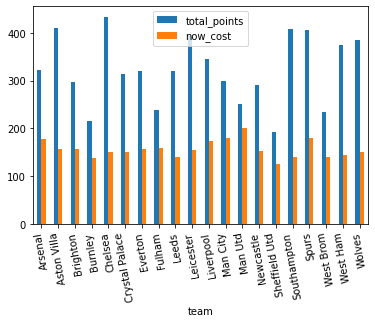

In [183]:
import matplotlib.pyplot as plt
team_pivot2.plot.bar(x = 'team', y = ['total_points', 'now_cost'], rot = 100)


In [184]:
team_pivot2.sort_values('value',ascending=False)

,team,now_cost,value_season,total_points,value
15,Southampton,139.0,76.7,408,2.935252
4,Chelsea,151.2,71.3,434,2.870370
1,Aston Villa,156.0,74.7,410,2.628205
18,West Ham,143.7,71.8,374,2.602644
19,Wolves,151.1,71.5,386,2.554600
9,Leicester,155.5,66.4,394,2.533762
8,Leeds,140.9,62.0,320,2.271114
16,Spurs,180.2,59.9,406,2.253052
5,Crystal Palace,150.6,58.3,313,2.078353
6,Everton,155.8,52.2,320,2.053915


In [185]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

In [186]:
goal_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
12,Martínez,Aston Villa,1,26.9,4.8,630,40,5.7,0,False,4.5,8.3,0.0,0,4,NaN,1741178,43740,354702,18553,Goalkeeper,25187
431,Fabianski,West Ham,1,2.3,5.0,720,41,5.1,1,True,6.5,8.2,0.0,0,3,NaN,86613,32297,61274,3174,Goalkeeper,29123
455,dos Santos Patrício,Wolves,1,7.5,5.5,720,40,5.0,0,False,6.0,7.3,0.0,0,4,NaN,286176,7959,215853,6605,Goalkeeper,1354
363,McCarthy,Southampton,1,19.9,4.5,720,33,4.1,1,False,4.0,7.3,0.0,0,4,NaN,575709,35840,655002,12072,Goalkeeper,23768
325,Darlow,Newcastle,1,1.8,5.0,720,35,4.4,0,False,4.0,7.0,0.0,0,1,NaN,151618,3952,79726,5624,Goalkeeper,-1672
217,Schmeichel,Leicester,1,11.8,5.5,720,34,4.2,1,False,5.5,6.2,0.0,0,3,NaN,234239,7604,385955,11738,Goalkeeper,-4134
213,Meslier,Leeds,1,4.1,4.5,720,26,3.2,1,False,2.8,5.8,0.0,0,2,NaN,294025,4143,113090,11026,Goalkeeper,-6883
417,Johnstone,West Brom,1,1.0,4.5,720,26,3.2,0,False,4.5,5.8,0.0,0,1,NaN,56439,2374,43093,1973,Goalkeeper,401
8,Leno,Arsenal,1,9.1,5.0,720,28,3.5,1,False,3.5,5.6,0.0,0,2,NaN,373499,5472,339192,16794,Goalkeeper,-11322


In [187]:
def_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
110,Zouma,Chelsea,2,16.1,5.3,630,48,6.9,3,True,6.5,9.1,3.0,0,3,NaN,1181941,113203,173287,27231,Defender,85972
369,Vestergaard,Southampton,2,8.2,4.7,585,40,5.7,0,False,6.5,8.5,2.0,0,4,NaN,570761,156015,49681,6814,Defender,149201
41,Mings,Aston Villa,2,11.6,5.3,630,42,6.0,2,True,4.8,7.9,2.0,1,4,NaN,834143,76833,195163,11484,Defender,65349
435,Cresswell,West Ham,2,8.2,5.1,720,38,4.8,1,False,3.5,7.5,0.0,3,3,NaN,622176,38531,163410,18745,Defender,19786
46,Konsa Ngoyo,Aston Villa,2,7.6,4.7,630,35,5.0,1,False,3.2,7.4,1.0,0,4,NaN,693820,14412,230932,13740,Defender,672
461,Saïss,Wolves,2,18.3,5.2,517,38,6.3,1,False,3.5,7.3,1.0,0,4,NaN,1676730,13725,731892,151288,Defender,-137563
239,Justin,Leicester,2,21.9,4.8,720,34,4.2,0,False,4.0,7.1,1.0,1,3,NaN,1273941,32152,566714,17895,Defender,14257
470,Kilman,Wolves,2,14.4,4.3,450,30,6.0,1,False,5.2,7.0,0.0,1,3,NaN,1018061,68742,142458,15089,Defender,53653
375,Walker-Peters,Southampton,2,11.5,4.5,720,31,3.9,1,False,4.0,6.9,0.0,1,4,NaN,476197,58987,442031,8532,Defender,50455


In [188]:
mid_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
37,Grealish,Aston Villa,3,34.6,7.5,630,60,8.6,2,True,6.2,8.0,4.0,6,4,4.0,2276645,204154,587272,23335,Midfielder,180819
390,Son,Spurs,3,58.6,9.6,640,74,9.2,4,True,7.2,7.7,8.0,2,3,2.0,4432165,50610,2301514,160701,Midfielder,-110091
141,Zaha,Crystal Palace,3,29.3,7.4,720,54,6.8,2,True,7.0,7.3,5.0,2,1,3.0,2317238,79418,995491,58538,Midfielder,20880
370,Ward-Prowse,Southampton,3,7.8,6.0,720,43,5.4,2,False,8.2,7.2,3.0,1,4,2.0,503519,91223,245539,30457,Midfielder,60766
105,Frello Filho,Chelsea,3,11.3,5.2,455,37,5.3,2,False,2.5,7.1,3.0,2,2,2.0,1175689,13685,643408,94089,Midfielder,-80404
450,Fornals,West Ham,3,1.8,6.4,660,42,5.2,0,False,4.2,6.6,2.0,3,3,NaN,147187,12722,36055,12033,Midfielder,689
198,Klich,Leeds,3,6.2,5.6,696,36,4.5,0,False,3.2,6.4,2.0,3,2,1.0,715697,10933,442272,20956,Midfielder,-10023
38,McGinn,Aston Villa,3,2.3,5.5,630,34,4.9,0,False,3.0,6.2,1.0,4,4,NaN,233592,8620,113562,10572,Midfielder,-1952
205,Sousa de Azevedo e Costa,Leeds,3,8.1,5.6,622,33,4.1,1,False,2.2,5.9,2.0,2,2,NaN,1027881,4266,586707,68126,Midfielder,-63860


In [189]:
fwd_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers
id,,,,,,,,,,,,,,,,,,,,,,
202,Bamford,Leeds,4,34.7,6.1,670,58,7.2,1,True,7.0,9.5,7.0,2,2,2.0,2771666,151736,828296,37682,Forward,114054
506,Wilson,Newcastle,4,14.9,6.6,697,55,6.9,1,False,5.2,8.3,6.0,2,2,1.0,1339574,17869,995958,130395,Forward,-112526
514,Watkins,Aston Villa,4,6.7,6.1,630,47,6.7,2,False,6.0,7.7,6.0,1,4,3.0,650825,147475,266807,9885,Forward,137590
388,Kane,Spurs,4,45.4,11.0,713,80,10.0,3,True,9.0,7.3,7.0,8,2,1.0,2620755,64442,578905,47760,Forward,16682
164,Calvert-Lewin,Everton,4,57.1,7.8,698,57,7.1,1,False,5.0,7.3,8.0,1,1,NaN,3876223,83713,616995,54681,Forward,29032
377,Adams,Southampton,4,4.3,5.9,675,41,5.1,1,False,7.8,6.9,3.0,3,4,NaN,299121,81557,297151,11393,Forward,70164
68,Maupay,Brighton,4,4.5,6.5,630,38,5.4,1,False,1.5,5.8,4.0,1,2,1.0,598990,4331,446875,39781,Forward,-35450
224,Vardy,Leicester,4,21.1,10.1,558,59,8.4,3,True,6.2,5.8,8.0,2,2,1.0,1405190,76746,1389517,21958,Forward,54788
366,Ings,Southampton,4,8.5,8.4,624,47,6.7,1,False,5.8,5.6,5.0,2,3,1.0,700623,1175,1747262,176435,Forward,-175260


In [190]:
events_df = pd.DataFrame(json['events'])

In [191]:
events_df.head(10)

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2020-09-12T10:00:00Z,50,True,True,4761681.0,1599904800,0,142.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 112843}...",259.0,12.0,254.0,"{'id': 254, 'points': 20}",0,4.0,4.0
1,2,Gameweek 2,2020-09-19T10:00:00Z,59,True,True,6234344.0,1600509600,0,165.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 94615},...",259.0,302.0,390.0,"{'id': 390, 'points': 24}",14637421,4.0,254.0
2,3,Gameweek 3,2020-09-26T10:00:00Z,43,True,True,6223553.0,1601114400,0,119.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 86797},...",259.0,164.0,224.0,"{'id': 224, 'points': 17}",20387878,272.0,254.0
3,4,Gameweek 4,2020-10-03T10:00:00Z,48,True,True,6563000.0,1601719200,0,160.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 82267},...",272.0,164.0,37.0,"{'id': 37, 'points': 24}",14570655,254.0,272.0
4,5,Gameweek 5,2020-10-17T10:00:00Z,60,True,True,7124486.0,1602928800,0,136.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 80554},...",164.0,390.0,117.0,"{'id': 117, 'points': 16}",18391649,390.0,254.0
5,6,Gameweek 6,2020-10-23T17:30:00Z,48,True,True,4289106.0,1603474200,0,123.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 58697},...",164.0,388.0,202.0,"{'id': 202, 'points': 17}",12707803,254.0,390.0
6,7,Gameweek 7,2020-10-30T18:30:00Z,53,True,True,6909580.0,1604082600,0,131.0,True,False,False,"[{'chip_name': 'bboost', 'num_played': 68374},...",390.0,232.0,370.0,"{'id': 370, 'points': 17}",8811577,388.0,390.0
7,8,Gameweek 8,2020-11-06T16:00:00Z,55,True,True,601887.0,1604678400,0,133.0,False,True,False,"[{'chip_name': 'bboost', 'num_played': 76086},...",390.0,110.0,302.0,"{'id': 302, 'points': 17}",9570772,388.0,390.0
8,9,Gameweek 9,2020-11-21T11:00:00Z,0,False,False,NaN,1605956400,0,NaN,False,False,True,[],NaN,NaN,NaN,None,0,NaN,NaN
9,10,Gameweek 10,2020-11-28T11:00:00Z,0,False,False,NaN,1606561200,0,NaN,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN


#  URL 2


In [192]:
points=pd.DataFrame()
for i in range(1,600):
  url2="https://fantasy.premierleague.com/api/element-summary/{0}/".format(i)
  r=requests.get(url2)
  json2=r.json()
  json2.keys()
  history_df = pd.DataFrame(json2['history'])
  t=history_df.total_points
  b=[]
  for j in range(0,8-t.size):
    b.append('Nan')
  b[j:]=t
  points=points.append(pd.Series(b),ignore_index=True)
points.index = np.arange(1, len(points)+1)
slim_elements_df["GW1"]=points[0]
slim_elements_df["GW2"]=points[1]
slim_elements_df["GW3"]=points[2]
slim_elements_df["GW4"]=points[3]
slim_elements_df["GW5"]=points[4]
slim_elements_df["GW6"]=points[5]
slim_elements_df["GW7"]=points[6]
slim_elements_df["GW8"]=points[7]



In [224]:
slim_elements_df_TP=slim_elements_df.sort_values('total_points',ascending=False)
slim_elements_df_VS=slim_elements_df.sort_values('value_season',ascending=False)
slim_elements_df_F=slim_elements_df.sort_values('form',ascending=False)

In [225]:
slim_elements_df_F.head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,total_points,points_per_game,dreamteam_count,in_dreamteam,form,value_season,goals_scored,assists,clean_sheets,penalties_order,transfers_in,transfers_in_event,transfers_out,transfers_out_event,position,net_trasnfers,GW1,GW2,GW3,GW4,GW5,GW6,GW7,GW8
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
388,Kane,Spurs,4,45.4,11.0,713,80,10.0,3,True,9.0,7.3,7.0,8,2,1.0,2620755,64442,578905,47760,Forward,16682,2,21,5,16,16,5,6.0,9.0
370,Ward-Prowse,Southampton,3,7.8,6.0,720,43,5.4,2,False,8.2,7.2,3.0,1,4,2.0,503519,91223,245539,30457,Midfielder,60766,2,2,3,3,2,11,17.0,3.0
302,Borges Fernandes,Man Utd,3,23.3,10.5,569,53,7.6,3,False,8.2,5.0,5.0,3,1,1.0,1480661,223431,1056884,11374,Midfielder,212057,2,12,6,11,3,2,17.0,NaN
117,Werner,Chelsea,4,24.0,9.4,695,43,5.4,1,False,8.0,4.6,4.0,2,3,1.0,1022611,75933,2482038,26447,Forward,49486,5,2,2,2,16,2,7.0,7.0
377,Adams,Southampton,4,4.3,5.9,675,41,5.1,1,False,7.8,6.9,3.0,3,4,NaN,299121,81557,297151,11393,Forward,70164,2,1,5,2,11,8,5.0,7.0
390,Son,Spurs,3,58.6,9.6,640,74,9.2,4,True,7.2,7.7,8.0,2,3,2.0,4432165,50610,2301514,160701,Midfielder,-110091,2,24,1,18,13,11,2.0,3.0
141,Zaha,Crystal Palace,3,29.3,7.4,720,54,6.8,2,True,7.0,7.3,5.0,2,1,3.0,2317238,79418,995491,58538,Midfielder,20880,8,15,1,2,9,13,1.0,5.0
202,Bamford,Leeds,4,34.7,6.1,670,58,7.2,1,True,7.0,9.5,7.0,2,2,2.0,2771666,151736,828296,37682,Forward,114054,7,14,8,1,2,17,2.0,7.0
114,Ziyech,Chelsea,3,12.5,8.1,189,27,6.8,2,False,6.8,3.3,1.0,3,1,NaN,895766,315223,153515,6797,Midfielder,308426,0,0,0,0,1,1,14.0,11.0
